/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


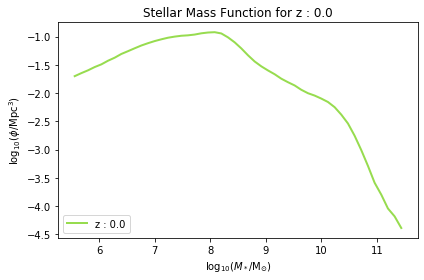

In [1]:
"""A simple example of plotting the stellar mass function (SMF) from Meraxes
output using single snapshot=100"""

# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from Functions import *
from dragons import meraxes, munge# DRAGONS modules for reading and dealing with model ouput

# First read in all of the galaxies at snapshot 100 (z=5).  Note that you will
# of course need to update the paths to any files appropriately.
#
# By specifying `sim_props=True` when reading the galaxies, we are also
# returned a dictionary of properties for the Meraxes run we are reading.
#gals, sim_props = meraxes.read_gals(fname_in, snapshot=100, sim_props=True)


#We want to read in all the snap shots using the function 'read snaplist'. Little h previously set as 0.7
range_in = (5.5, 11.5)
snapshot_used = 250
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)
snaps = snaplist[0]


#print('gals: ', gals)
#print('sim_props: ', sim_props)
#gsp_foreach_snap.append(gals) #add the galaxies to the array
#gsp_foreach_snap.append(sim_props)#add the simulation properties to the array
#print('new array item:', gsp_foreach_snap)
snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = round(redshift_used, 1) # round float to nearest whole int
redshift_used = str(redshift_used)
redshift_used

# The units of stellar masses ouput by the model are 1e10 Msol.  Let's convert
# this to log10(M/Msol).
gals["StellarMass"] = np.log10(gals["StellarMass"]*1e10)
#print('gals: ', gals["StellarMass"])

# The `munge` module has a nice function that will calculate the mass function
# for us.  Take a look at the source code for this function if you are
# interested to see how it does this (recommended).
# mf = "mass function"
mf = munge.mass_function(gals["StellarMass"], sim_props["Volume"], bins=50,
                         range=range_in)
#print('new mf array item: ', mf)
# Now let's plot the mass function...
''' uncomment for separate plots
    # Create a new figure (with 1 column and 1 row) and axis
    fig, ax = plt.subplots(1, 1)
'''
# Plot the mass function
plot_label = ('z : ' + redshift_used)
#print(plot_number)

# Create a new figure (with 1 column and 1 row) and axis
fig, ax = plt.subplots(1, 1)
plt.title("Stellar Mass Function for " + plot_label)

ax.plot(mf[:, 0], np.log10(mf[:, 1]), color=np.random.rand(3,), lw=2,
        label=plot_label)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_* / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^3})$")

# Add the legend
ax.legend(loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()
name_of_plot=("SMF_z-" + redshift_used)
plt.savefig("plots/" + name_of_plot + ".pdf")

